# **Импорт и открытие train.csv**

In [3]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


In [5]:
csv_file_path = '/content/gdrive/MyDrive/train.csv'
df = pd.read_csv(csv_file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Визуализация распределения значений признаков** *'Survived', 'Pclass', 'Age', 'Sex', 'Parch'*

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

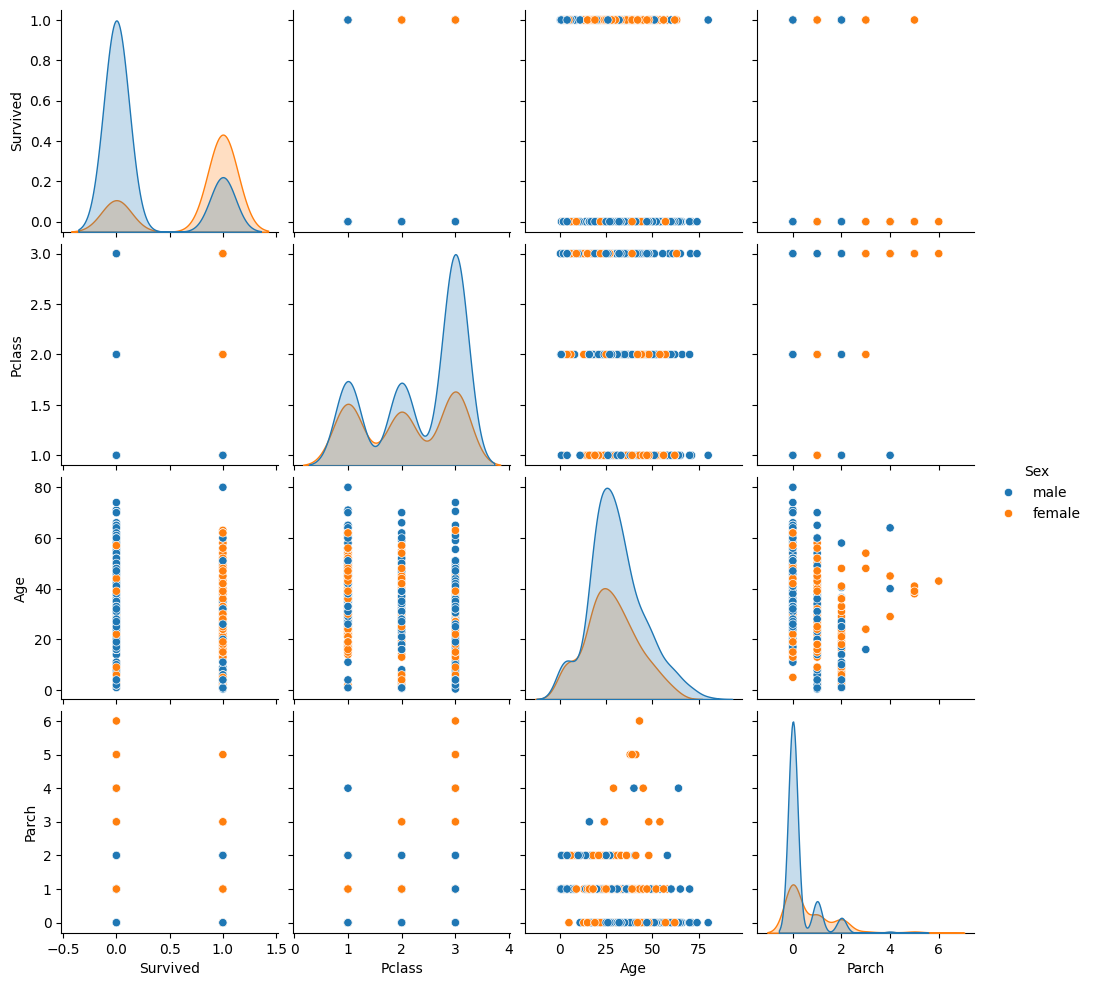

In [49]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Sex', 'Parch']].dropna(), hue='Sex')

# **Построение графика типа *boxplot* для столбца** *'Age'* **и его интерпретация**

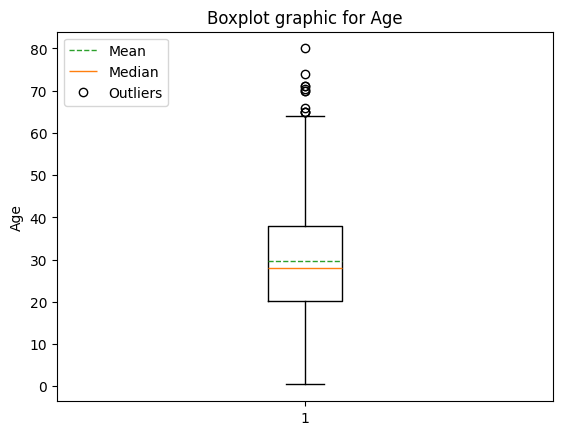

In [38]:
x = df['Age'].dropna()

fig, ax = plt.subplots()
leg = ax.boxplot(x, showmeans=True, meanline=True)

ax.set_title('Boxplot graphic for Age')
ax.set_ylabel('Age')
ax.legend([leg["means"][0], leg["medians"][0], leg['fliers'][0]], ['Mean', 'Median', 'Outliers'], loc='upper left');

**На графике Boxplot для возраста мы наблюдаем:**


*   **Средняя линия (Mean)** - показывает средний возраст пассажиров;
*   **Медиана (Median)** - делит пассажиров на 2 равные части, где первая половина данных будет больше медианного значения, а вторая - меньше;
*   **"Коробка" (Interquartile Range (IQR))** - показывает разброс данных между 25% и 75% процентилем. Чем длиннее "коробка", тем больший разброс между данными;
*   **"Усы"** - показывает диапазон значений данных, от минимального до максимального;
*   **Выбросы (Outliers)** - точки, находящиеся за пределами "усов". В нашем случае это не является ошибочными данными, т.к. мы работаем с возрастом, соответственно это может быть вызвано младенцами и пожилыми людьми, которые составляют меньшинство на судне.

    Исходя из нашего графика, в категорию выбросов попали только старые люди, значит их было меньшинство.




# **Построение графика типа** *pie chart* **для переменных** *'Survived', 'Pclass' + %*

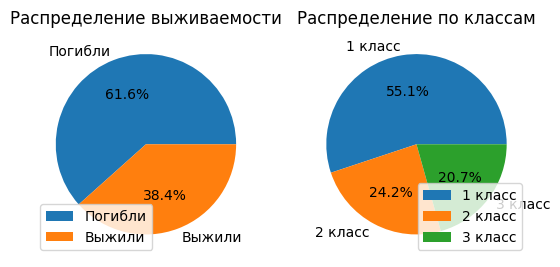

In [64]:
survived = df['Survived'].value_counts()
pclass = df['Pclass'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(survived, labels=['Погибли', 'Выжили'], autopct='%1.1f%%')
ax1.set_title('Распределение выживаемости')
ax1.legend(loc='lower left')

ax2.pie(pclass, labels=['1 класс', '2 класс', '3 класс'], autopct='%1.1f%%')
ax2.set_title('Распределение по классам')
ax2.legend(loc='lower right')               #Любое другое расположение легенды для классов перекрывало проценты.

# **Построение графика типа** *pairplot* **для всех числовых переменных датасета**

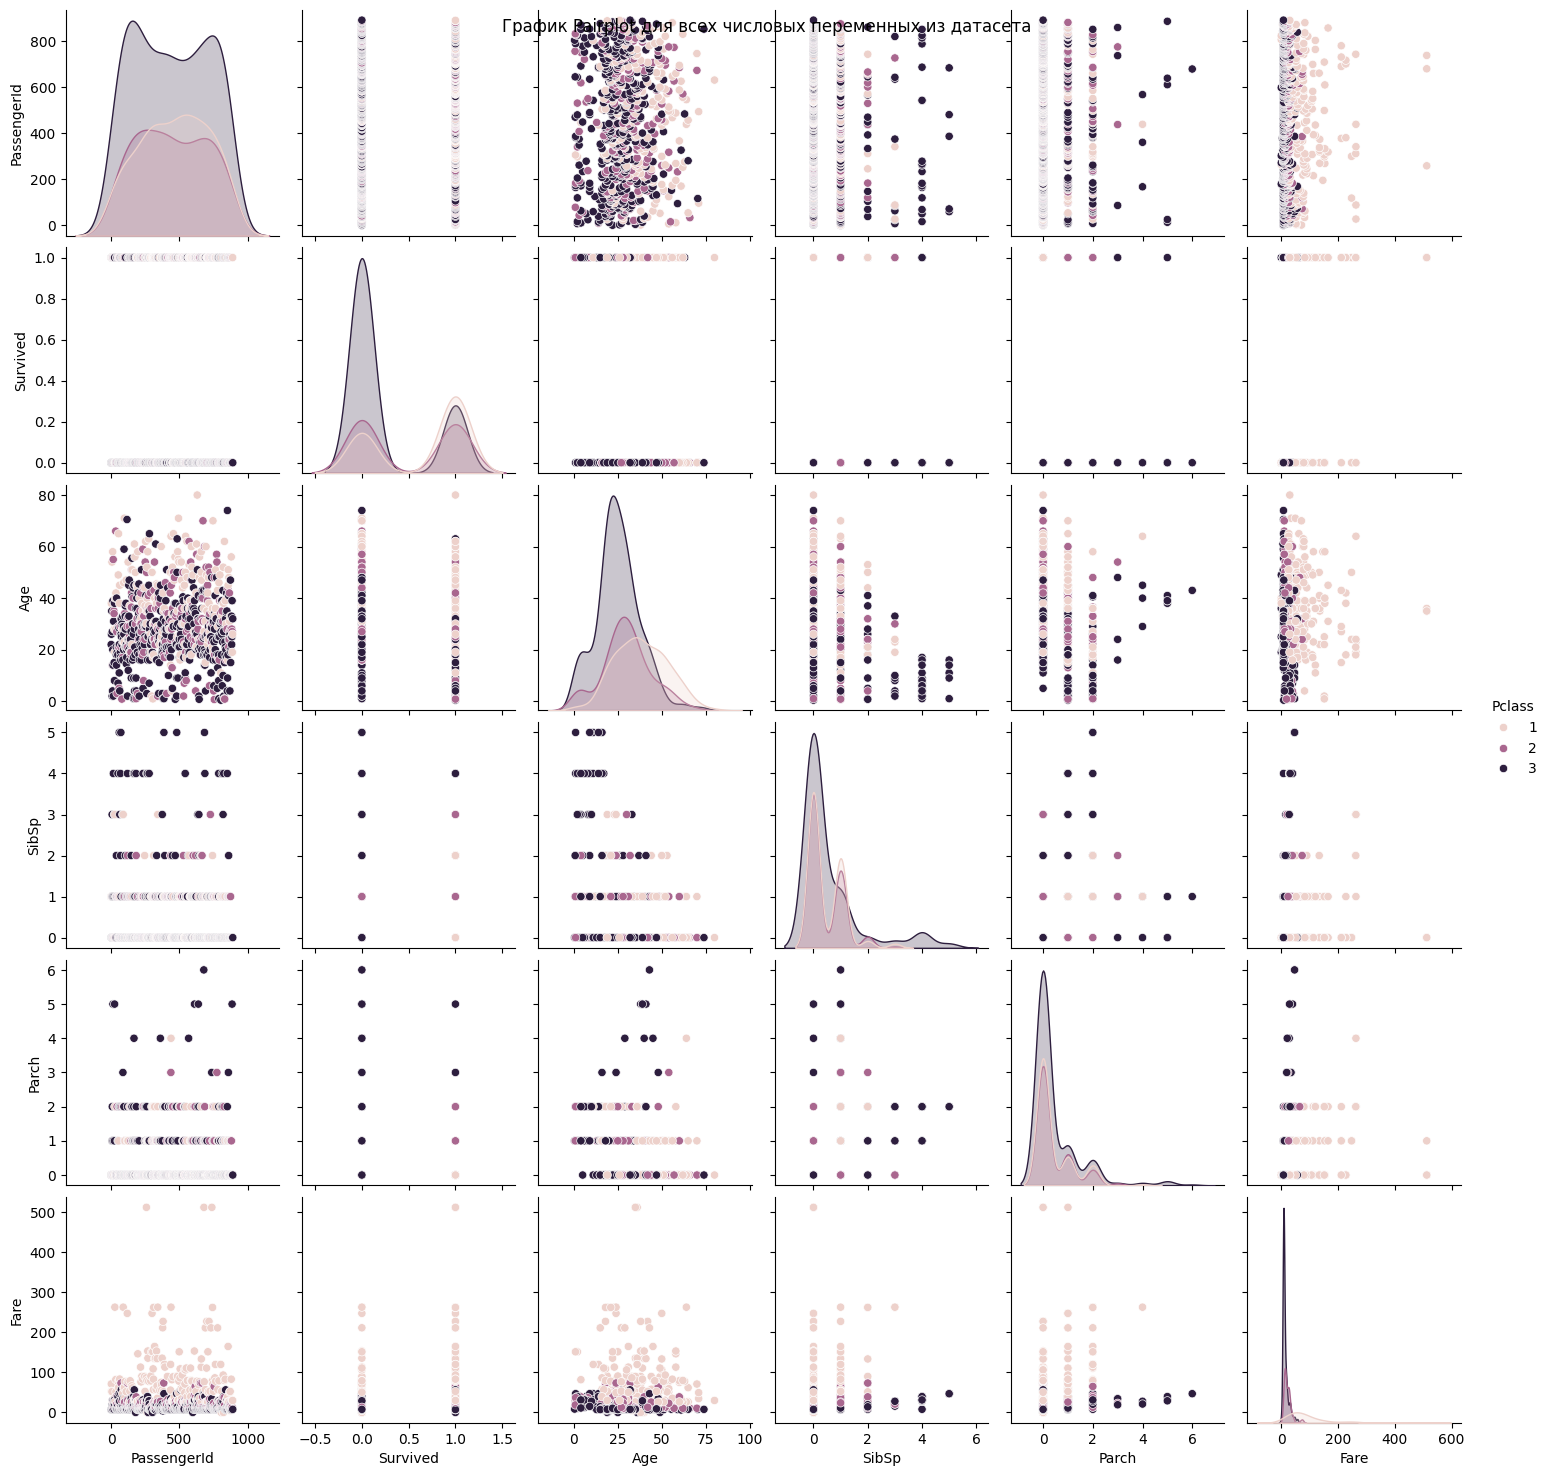

In [68]:
only_numbers = df.select_dtypes(include=['int64', 'float64'])

sns.pairplot(only_numbers.dropna(), hue='Pclass')

plt.suptitle('График Pairplot для всех числовых переменных из датасета')
plt.show()

# **Построение интерактивного графика** *sunburst plot* **с помощью** *plotly*. **На первом уровне иерархии** - *количество пассажиров в каждом из классов*, **а на втором** - *количество женщин/мужчин в этом классе*

In [79]:
sunburst_data = df.groupby(['Pclass', 'Sex']).size().reset_index(name='count')

fig = px.sunburst(sunburst_data,
                  path=['Pclass', 'Sex'],                                       #Нашел структуру path, которая автоматически выстраивает иерархию в Plotly, и не нужно указывать родителей, т.к.
                  values='count',                                               #male/female уже принадлежит к sex, а 1, 2, 3 к Pclass. И получается, что male/female уже автоматически присваивается
                  title='Sunburst plot: Пассажиры Титаника по классам и полу',  #к 1, 2, 3, которые, в свою очередь, уже присвоены к Pclass.
                  color='count',
                  color_continuous_scale='Blues'                                #p.s. Пробовал сделать через parents, но не получалось... потом уже нашел информацию про структуру path.
)

fig.show()